In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten
from keras.layers.core import Lambda
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Max\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6469090655164927197
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 3239362560
locality {
  bus_id: 1
}
incarnation: 4419427594582052429
physical_device_desc: "device: 0, name: GeForce GTX 970, pci bus id: 0000:02:00.0"
]


In [3]:
def PermaDropout(rate):
    return Lambda(lambda x: K.dropout(x, level=rate))

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(PermaDropout(0.7))
# model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(PermaDropout(0.5))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
lambda_1 (Lambda)            (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
lambda_2 (Lambda)            (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [4]:
mnist = input_data.read_data_sets("F:\\datasets\\MNIST", one_hot=True)
not_mnist = input_data.read_data_sets("F:\\datasets\\notMNIST", one_hot=True)

Extracting F:\datasets\MNIST\train-images-idx3-ubyte.gz
Extracting F:\datasets\MNIST\train-labels-idx1-ubyte.gz
Extracting F:\datasets\MNIST\t10k-images-idx3-ubyte.gz
Extracting F:\datasets\MNIST\t10k-labels-idx1-ubyte.gz
Extracting F:\datasets\notMNIST\train-images-idx3-ubyte.gz
Extracting F:\datasets\notMNIST\train-labels-idx1-ubyte.gz
Extracting F:\datasets\notMNIST\t10k-images-idx3-ubyte.gz
Extracting F:\datasets\notMNIST\t10k-labels-idx1-ubyte.gz


In [5]:
# Get Data
x_train_mnist = mnist.train.images.reshape((-1, 28, 28, 1))
y_train_mnist = mnist.train.labels
x_val_mnist = mnist.validation.images.reshape((-1, 28, 28, 1))
y_val_mnist = mnist.validation.labels


In [24]:
# Train Model # .7 dropout
model.fit(x_train_mnist, y_train_mnist, validation_data=(x_val_mnist, y_val_mnist), epochs=2)

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 19s - loss: 0.0905 - acc: 0.9717 - val_loss: 0.0770 - val_acc: 0.9790
Epoch 2/2
55000/55000 [==============================] - 19s - loss: 0.0693 - acc: 0.9783 - val_loss: 0.0776 - val_acc: 0.9746


In [7]:
# print("0.7 conv dropout, 0.5 fc dropout")
# print(x_test.shape)
# test_mean_preds = np.empty((len(x_test), 10))
# for i, test in enumerate(x_test):
#     if not i % 1000:
#         print("{}% done".format(i / len(x_test)))
#     predictions = np.empty((50, 10))
#     for j in range(50):
#         preds = model.predict(test.reshape((1, 28, 28, 1)))
#         # print(preds.shape)
#         predictions[j] = preds
#     test_mean_preds[i] = predictions.mean(axis=0)
# print("100% done")

In [8]:
# def histogram(data,myBins,w,h,figTitle,save='do not save'):
#     print("Mean: %5.3f | Median: %5.3f | Min: %5.3f | Max: %5.3f" % (np.mean(data),np.median(data),min(data),max(data)))
#     hist, bins = np.histogram(data,bins=myBins)
#     width = 0.7 * (bins[1] - bins[0])
#     center = (bins[:-1] + bins[1:]) / 2
#     plt.figure(num=None, figsize=(w,h), dpi=80, facecolor='w', edgecolor='k')
#     plt.title(figTitle,fontsize=12)
#     plt.bar(center, hist, align='center', width=width)
#     if save=='save':
#         plt.savefig(figTitle)
#     plt.show()    

In [9]:
# oOSMax = [np.max(x) for x in test_mean_preds]
# histogram(oOSMax, 25, 8, 5, "oOSMax")

In [10]:
# print(test_mean_preds)
# for x in test_mean_preds:
#     if np.argmax(x)

### testing on just one example

In [11]:
plt.imshow(x_test[4].reshape((28, 28)))
plt.show()

preds = model.predict(x_test[4].reshape((1, 28, 28, 1)))
print('predicted label:', np.argmax(preds))
print('confidence: ', np.max(preds))
print(preds)

NameError: name 'x_test' is not defined

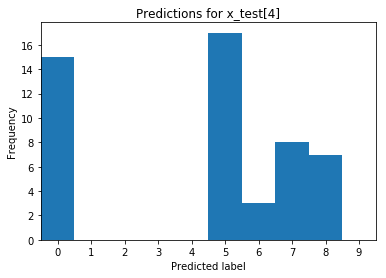

In [40]:
# predictions = model.predict(x_test[0:5])
# print(np.max(predictions, axis=1))
# print(predictions[4])

predictions = np.empty((50, 10))
for j in range(50):
        preds = model.predict(x_test[4].reshape((1, 28, 28, 1)))
        predictions[j] = preds

argmax_preds = np.argmax(predictions, axis=1)
plt.hist(argmax_preds, bins=np.arange(10)-0.5)
plt.xticks(np.arange(0, 10))
plt.xlim(0-0.5, 10-0.5)
plt.title("Predictions for x_test[4]")
plt.ylabel("Frequency")
plt.xlabel("Predicted label")
plt.show()

### Test on unseen notMNIST data

In [7]:
x_test_notMNIST = not_mnist.test.images.reshape((-1, 28, 28, 1))
y_test_notMNIST = not_mnist.test.labels

In [8]:
# print("0.7 conv dropout, 0.5 fc dropout")
# correct = 0
# incorrect = 0
# incorrect_ids = []

# test_mean_preds_mnist = np.empty((len(x_test_notMNIST), 10))
# for i, test in enumerate(x_test_notMNIST):
#     # Log percent complete
#     if not i % 1000:
#         print("{}% done".format(i / len(x_test_notMNIST)))
        
#     # Predict 50 times for each sample
#     predictions = np.empty((50, 10))
#     for j in range(50):
#         preds = model.predict(test.reshape((1, 28, 28, 1)))
#         predictions[j] = preds
        
#     # Store mean predictions
#     mean_predictions = predictions.mean(axis=0)
#     test_mean_preds_mnist[i] = mean_predictions
#     if np.argmax(mean_predictions) == np.argmax(y_test_notMNIST[i]):
#         correct += 1
#     else:
#         incorrect += 1
#         incorrect_ids.append(i)
        
# print("100% done")
# print("accuracy on set:", str(correct / (correct + incorrect)))

In [25]:
# mc_predictions = np.zeros((10000, 10))
predictions_notMNIST = np.zeros((10000, 10))
for z in range(50):
    if not z % 5:
        print("{}% done".format((z / 50) * 100))
    preds = model.predict(x_test_notMNIST)

    # Calculate moving average
    predictions_notMNIST = predictions_notMNIST + (preds - predictions_notMNIST) / (z + 1)
    
print("100% done")

0.0% done
10.0% done
20.0% done
30.0% done
40.0% done
50.0% done
60.0% done
70.0% done
80.0% done
90.0% done
100% done


## Test on unseen MNIST data

In [10]:
x_test_mnist = mnist.test.images.reshape((-1, 28, 28, 1))
y_test_mnist = mnist.test.labels

In [26]:
predictions_mnist = np.zeros((10000, 10))
for z in range(50):
    if not z % 5:
        print("{}% done".format((z / 50) * 100))
    preds = model.predict(x_test_mnist)

    # Calculate moving average
    predictions_mnist = predictions_mnist + (preds - predictions_mnist) / (z + 1)

print("100% done")

0.0% done
10.0% done
20.0% done
30.0% done
40.0% done
50.0% done
60.0% done
70.0% done
80.0% done
90.0% done
100% done


In [27]:
correct = 0
incorrect = 0
incorrect_ids = []

for i in range(10000):
    if np.argmax(predictions_mnist[i]) == np.argmax(y_test_mnist[i]):
        correct += 1
    else:
        incorrect += 1
        incorrect_ids.append(i)

acc = correct / (correct + incorrect)
print("Accuracy:", str(acc*100), "%")

Accuracy: 98.42999999999999 %


## Plotting confidence scores

In [28]:
confidence = np.amax(predictions_mnist, axis=1)
confidence_ood = np.amax(predictions_notMNIST, axis=1)
print(confidence.shape)

(10000,)


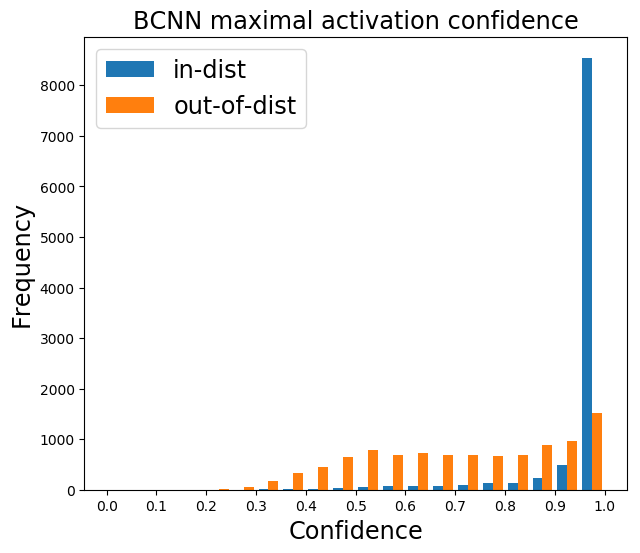

In [25]:
plt.figure(figsize=(7, 6), dpi=100)
plt.title("BCNN maximal activation confidence", fontsize='xx-large')
plt.hist([confidence, confidence_ood], bins=np.linspace(0.0, 1.0, num=21), label=['in-dist', 'out-of-dist'])
# plt.hist(confidence, bins=np.linspace(0.0, 1.0, num=21))
plt.xticks(np.linspace(0.0, 1.0, num=11))
plt.legend(fontsize='xx-large')
plt.ylabel("Frequency", fontsize='xx-large')
plt.xlabel("Confidence", fontsize='xx-large')
# plt.tight_layout()
# plt.savefig("bcnn_1")
plt.show()

In [29]:
from scipy.stats import entropy

neg_entropies = -np.apply_along_axis(entropy, 1, predictions_mnist)
neg_entropies_ood = -np.apply_along_axis(entropy, 1, predictions_notMNIST)
print(neg_entropies.shape)

(10000,)


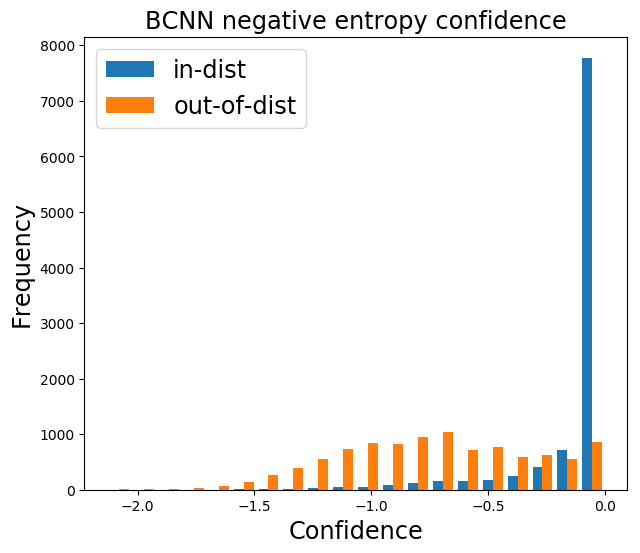

In [30]:
plt.figure(figsize=(7, 6), dpi=100)
plt.title("BCNN negative entropy confidence", fontsize='xx-large')
plt.hist([neg_entropies, neg_entropies_ood], bins=20, label=['in-dist', 'out-of-dist'])
plt.legend(fontsize='xx-large')
plt.ylabel("Frequency", fontsize='xx-large')
plt.xlabel("Confidence", fontsize='xx-large')
# plt.tight_layout()
# plt.savefig("bcnn_2")
plt.show()

## histogram intersection

In [44]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

In [45]:
print(return_intersection(confidence, confidence_ood))

0.9896584832527162


In [46]:
hist1,bins=np.histogram(confidence)
hist2,bins=np.histogram(confidence_ood)

In [47]:
print(return_intersection(hist1, hist2))

0.3475


In [48]:
hist3,bins=np.histogram(neg_entropies)
hist4,bins=np.histogram(neg_entropies_ood)

In [49]:
print(return_intersection(hist3, hist4))

0.3121


In [36]:
from scipy import stats

print(stats.ttest_ind(confidence,confidence_ood))
print(stats.ttest_ind(neg_entropies,neg_entropies_ood))

Ttest_indResult(statistic=112.09090723666269, pvalue=0.0)
Ttest_indResult(statistic=129.29379881179202, pvalue=0.0)


# ROC curves

## maximal activation

0.92276164


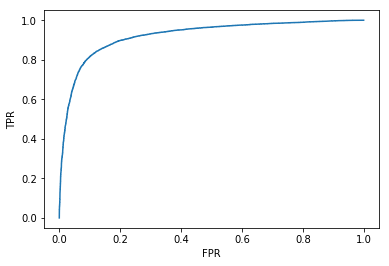

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = np.concatenate( ( np.ones(len(confidence)), np.zeros(len(confidence_ood)) ) )
y_score = np.concatenate((confidence, confidence_ood))
fpr_softmax, tpr_softmax, thresholds_softmax = roc_curve(y_true, y_score)
auc_metric = auc(fpr_softmax, tpr_softmax)

print(auc_metric)

plt.plot(fpr_softmax, tpr_softmax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## neg entropy

0.9250553300000001


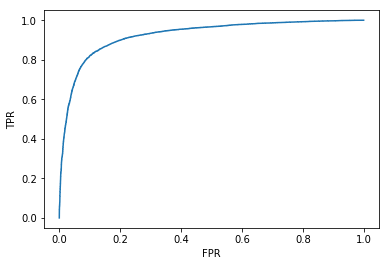

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = np.concatenate( ( np.ones(len(neg_entropies)), np.zeros(len(neg_entropies_ood)) ) )
y_score = np.concatenate((neg_entropies, neg_entropies_ood))
fpr_neg_ent, tpr_neg_ent, thresholds = roc_curve(y_true, y_score)
auc_metric = auc(fpr_neg_ent, tpr_neg_ent)

print(auc_metric)

plt.plot(fpr_neg_ent, tpr_neg_ent)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# save arrays

In [39]:
np.save('fpr_softmax', fpr_softmax)
np.save('tpr_softmax', tpr_softmax)
np.save('confidence', confidence)
np.save('confidence_ood', confidence_ood)

np.save('fpr_neg_ent', fpr_neg_ent)
np.save('tpr_neg_ent', tpr_neg_ent)
np.save('neg_entropies', neg_entropies)
np.save('neg_entropies_ood', neg_entropies_ood)